# Different data formats

In [1]:
import pathlib

import numpy as np
import pandas as pd
from rich import print

import cellpy
from cellpy.utils import example_data, plotutils

In [2]:
# Comment out this when running the notebook locally to get interactive plots
import plotly.io as pio
pio.renderers.default = "png"

## PEC CSV data

In [3]:
p = example_data.pec_file_path()
print(f"{p.name=}")

p.name='pec.csv'

In [4]:
with open(p) as datafile:
    rawdata = datafile.readlines(1800)
for n, line in enumerate(rawdata):
    print(f"[{n:02}] {line.strip()}")

[00] Request Year:,2019

[01] Test:,187

[02] Test Description:,

[03] TestRegime Name:,SAFT VL43EFe dQdV C/25

[04] TestRegime Suffix:,HWL

[05] TestRegime CellSize:,Default cellsize

[06] TestRegime Version:,1

[07] Project Group Name:,Immediate

[08] Project Group Description:,Immediate

[09] Project Group Memo:,

[10] Project Group Storage Environment:,R.T./AMB

[11] Project Group Test Environment:,R.T./AMB

[12] Number Of Cells:,1

[13] Parameter names:,

[14] Parameter values:,

[15] Variable names:

[16] LotID:,

[17] Lot Description:,

[18] Date Made:,1/21/2003 0:00

[19] Origin:,Other

[20] Requestor:,Admin

[21] Product ID:,Default product

[22] Storage Temp:,R.T./AMB

[23] Storage Delay:,0 days

[24] Test Temp:,R.T./AMB

[25] Start Time:,02/22/2019 16:21:35

[26] End Time:,1/1/0001 0:00

[27] Operator Instructions:,Also connect cell temp to channel TC-K and ambient temp to NTC

[28] #RESULTS CHECK

[29] ReqYear,Test,CellNr,Type,Value,Reason,

[30] 2019,187,1,1,3272,3,

[31] #END RESULTS CHECK

[32] Test,Cell,Rack,Shelf,Position,Cell ID,Step,Cycle,Total Time (Seconds),Load On Time (Seconds),Step Time 
(Seconds),Cycle Charge Time (Seconds),Cycle Discharge Time (Seconds),Real Time,Position Start Time,Voltage 
(mV),Current (mA),Charge Capacity (mAh),Discharge Capacity (mAh),Charge Capacity (mWh),Discharge Capacity 
(mWh),ReasonCode,50% DoD (mV),PeakPower 1 (W),PeakPower 2 (W),Open Circuit Voltage 1 (V),Open Circuit Voltage 2 
(V),Internal Resistance 1 (mOhm),Internal Resistance 2 (mOhm),Ambient temperature (Â°C),Cell surface temperature 
(Â°C),DC Internal Resistance (mOhm),AC Internal Resistance (mOhm),Station Temperature (Â°C),

[33] 187,1,SBT0550,001,1,,0,0,1,0,1,0,0,02/22/2019 16:23:27,02/22/2019 
16:23:26,3272.632,0,0,0,0,0,30,0,0,0,0,0,0,0,25.83,24.9,,,,

[34] 187,1,SBT0550,001,1,,0,0,5,0,5,0,0,02/22/2019 16:23:31,02/22/2019 
16:23:26,3272.2776,0,0,0,0,0,30,0,0,0,0,0,0,0,25.83,24.9,,,,

[35] 187,1,SBT0550,001,1,,0,0,10,0,10,0,0,02/22/2019 16:23:36,02/22/2019 
16:23:26,3272.5264,0,0,0,0,0,30,0,0,0,0,0,0,0,25.83,24.9,,,,

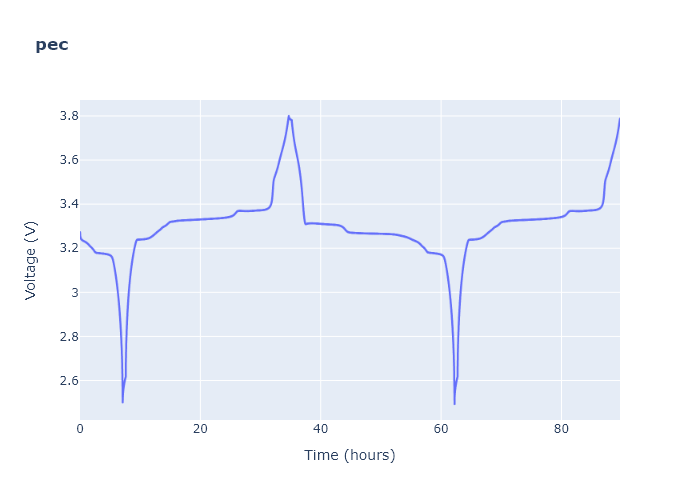

In [5]:
c = cellpy.get(p, instrument="pec_csv", cycle_mode="full_cell")
plotutils.raw_plot(c)

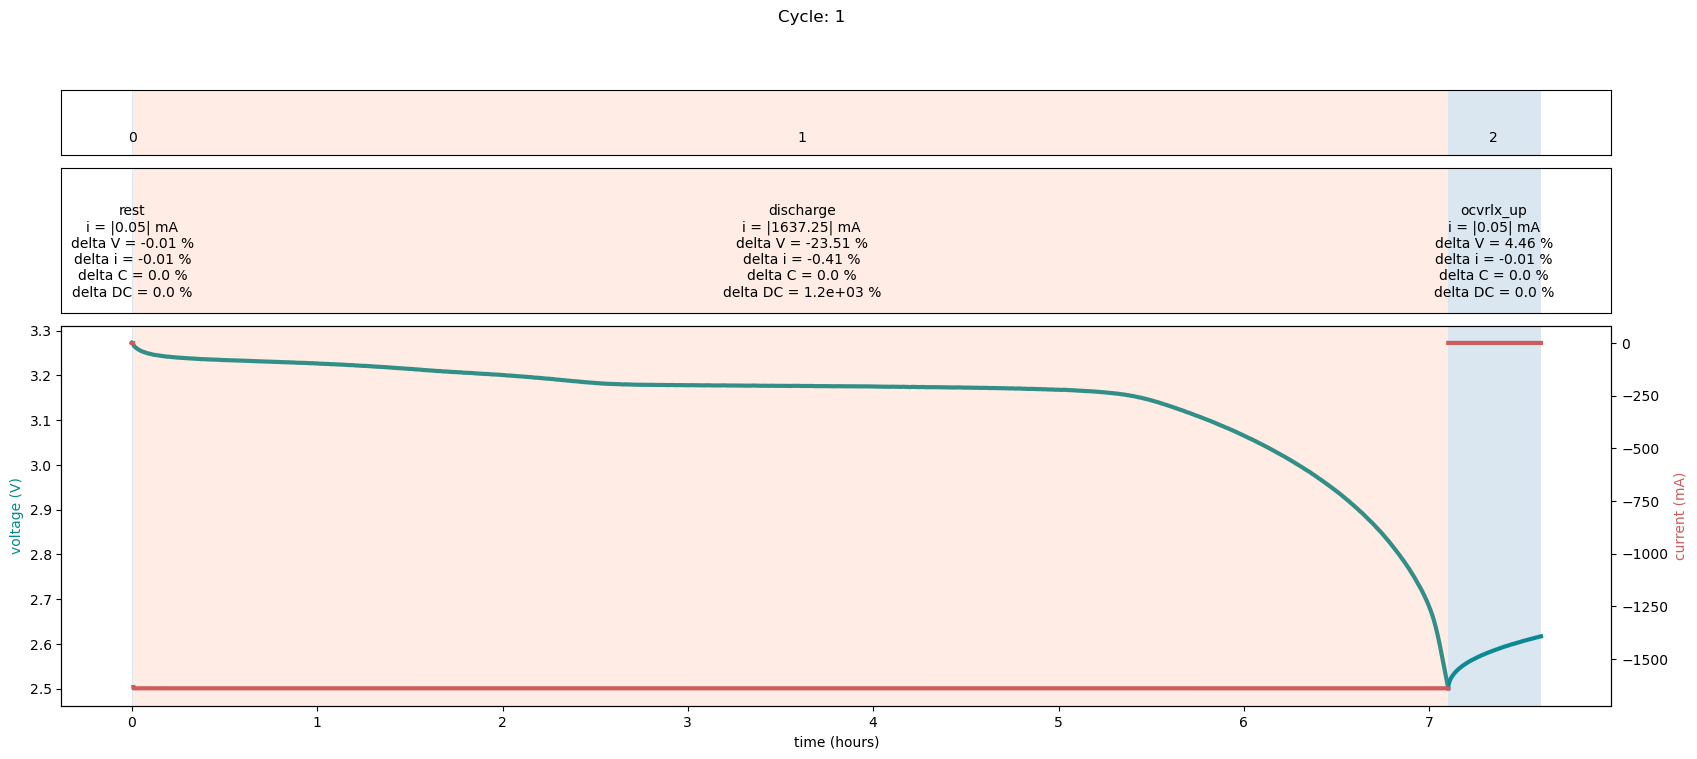

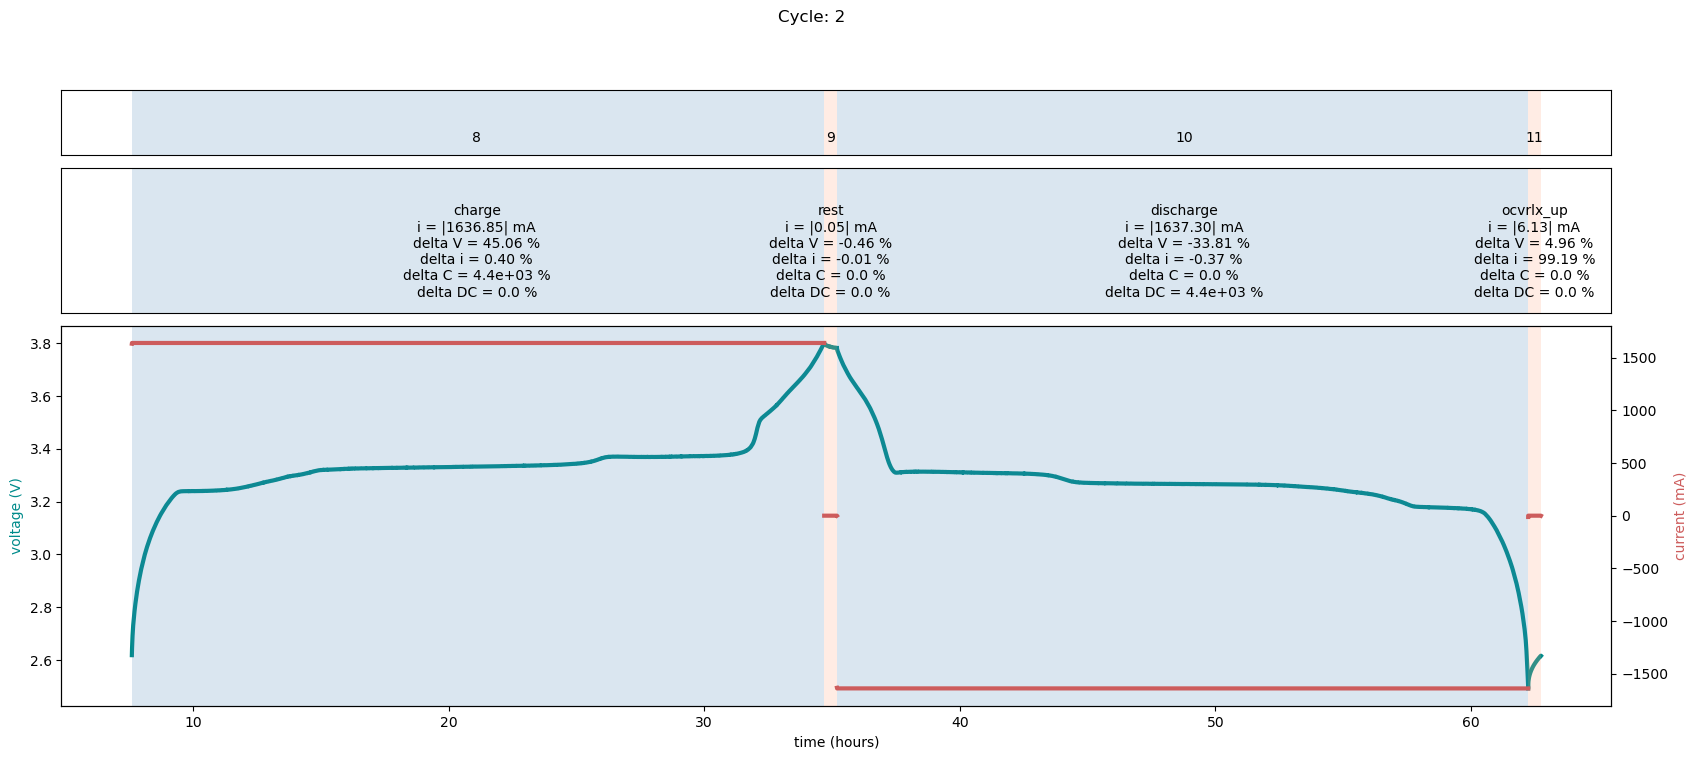

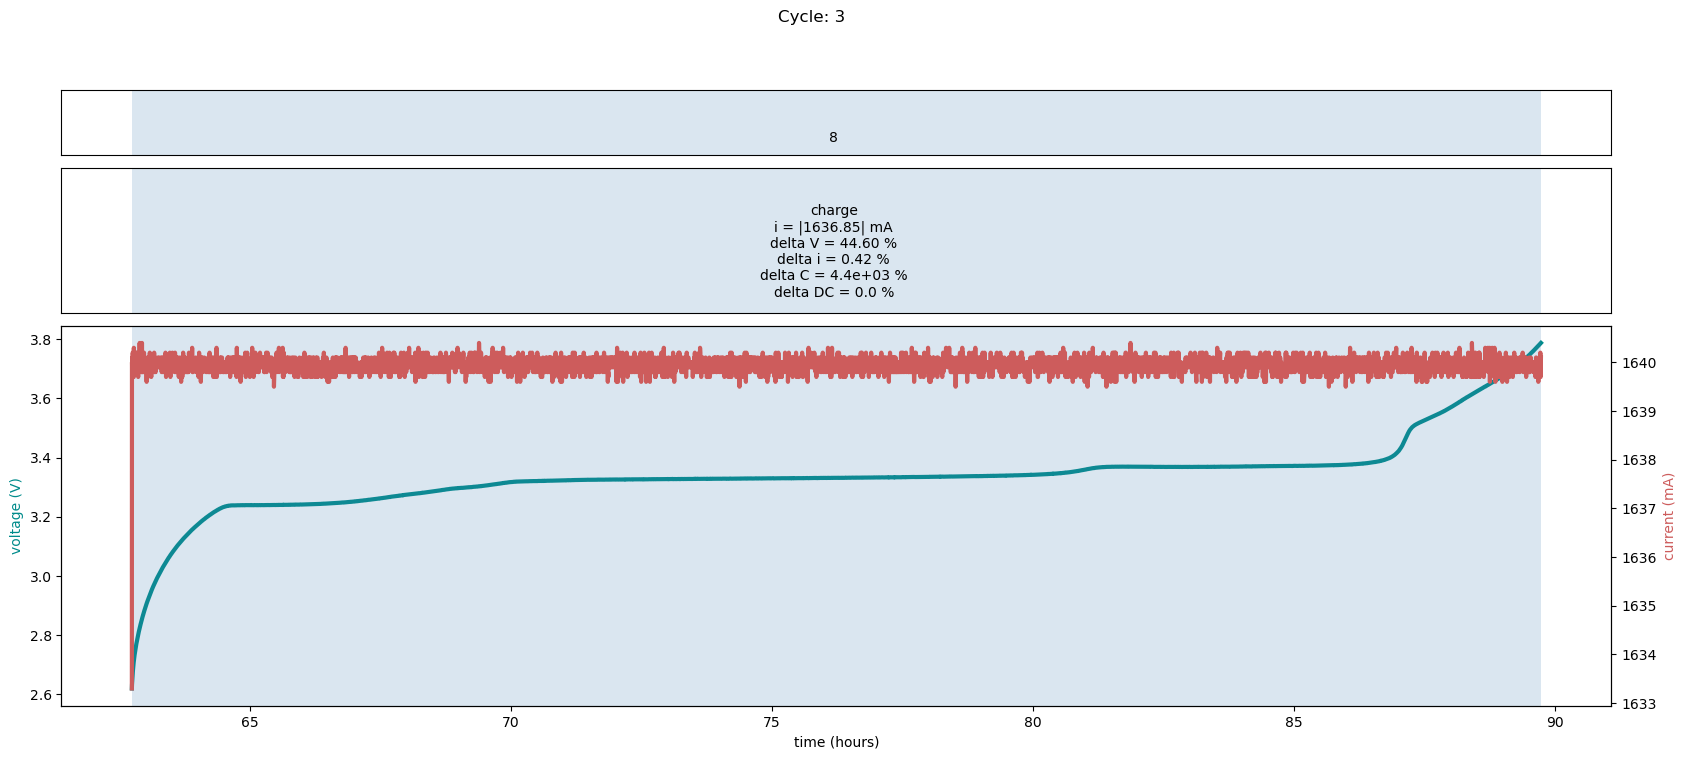

In [6]:
for cycle in c.get_cycle_numbers():
    plotutils.cycle_info_plot(c, cycle=cycle, interactive=False)

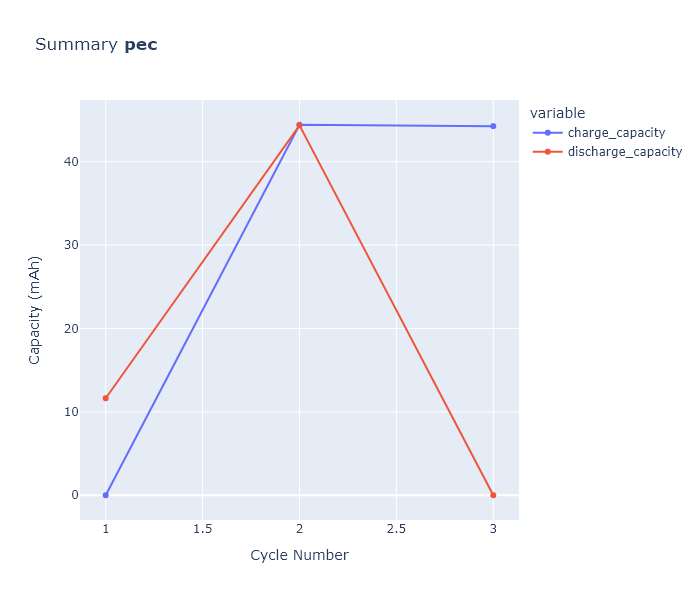

In [7]:
plotutils.summary_plot(c, y="capacities")

## Custom data